In [8]:
import JupyterNotebooksLib as slicernb
import slicer
import ipywidgets
ipywidgets.HTML(f'<h1><center><a href="{slicernb.AppWindow.defaultDesktopUrl()}" target="_blank"><img src="https://www.slicer.org/assets/img/3D-Slicer-Mark.svg" width="100" height="100"/><br>Click here to open 3D Slicer in a new window</a></center></h1>')

HTML(value='<h1><center><a href="/desktop/" target="_blank"><img src="https://www.slicer.org/assets/img/3D-Sli…

In [9]:
import vtk
reader = vtk.vtkDataSetReader()
reader.SetFileName("C:\\Users\\Solayman\\Downloads\\Dental_Files\\reg.r.m.med.label.model.clipped.2.vtk")
reader.ReadAllScalarsOn()  # Activate the reading of all scalars
reader.Update()

In [10]:
reader.GetHeader()

'3D Slicer output. SPACE=LPS'

In [11]:
data=reader.GetOutput()

In [12]:
data.GetNumberOfPoints()

258901

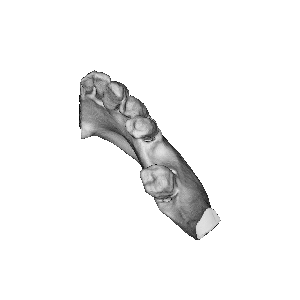

In [13]:
modelNode = slicer.modules.models.logic().AddModel(slicernb.localPath("C:\\Users\\Solayman\\Downloads\\Dental_Files\\post.r.m.simple.meddian.Model.vtk"))
slicernb.displayable(modelNode)

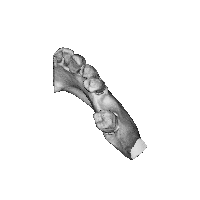

interactive(children=(FloatSlider(value=0.0, description='roll', max=90.0, min=-90.0, step=5.0), FloatSlider(v…

In [14]:
# Interactive view rotation

from ipywidgets import interact
@interact(roll=(-90.0,90.0,5), pitch=(-90.0,90.0,5), yaw=(-90.0,90.0,5))
def update(roll=0, pitch=0, yaw=0):
    return slicernb.ModelDisplay(modelNode, orientation=[roll, pitch, yaw], imageSize=[200,200])


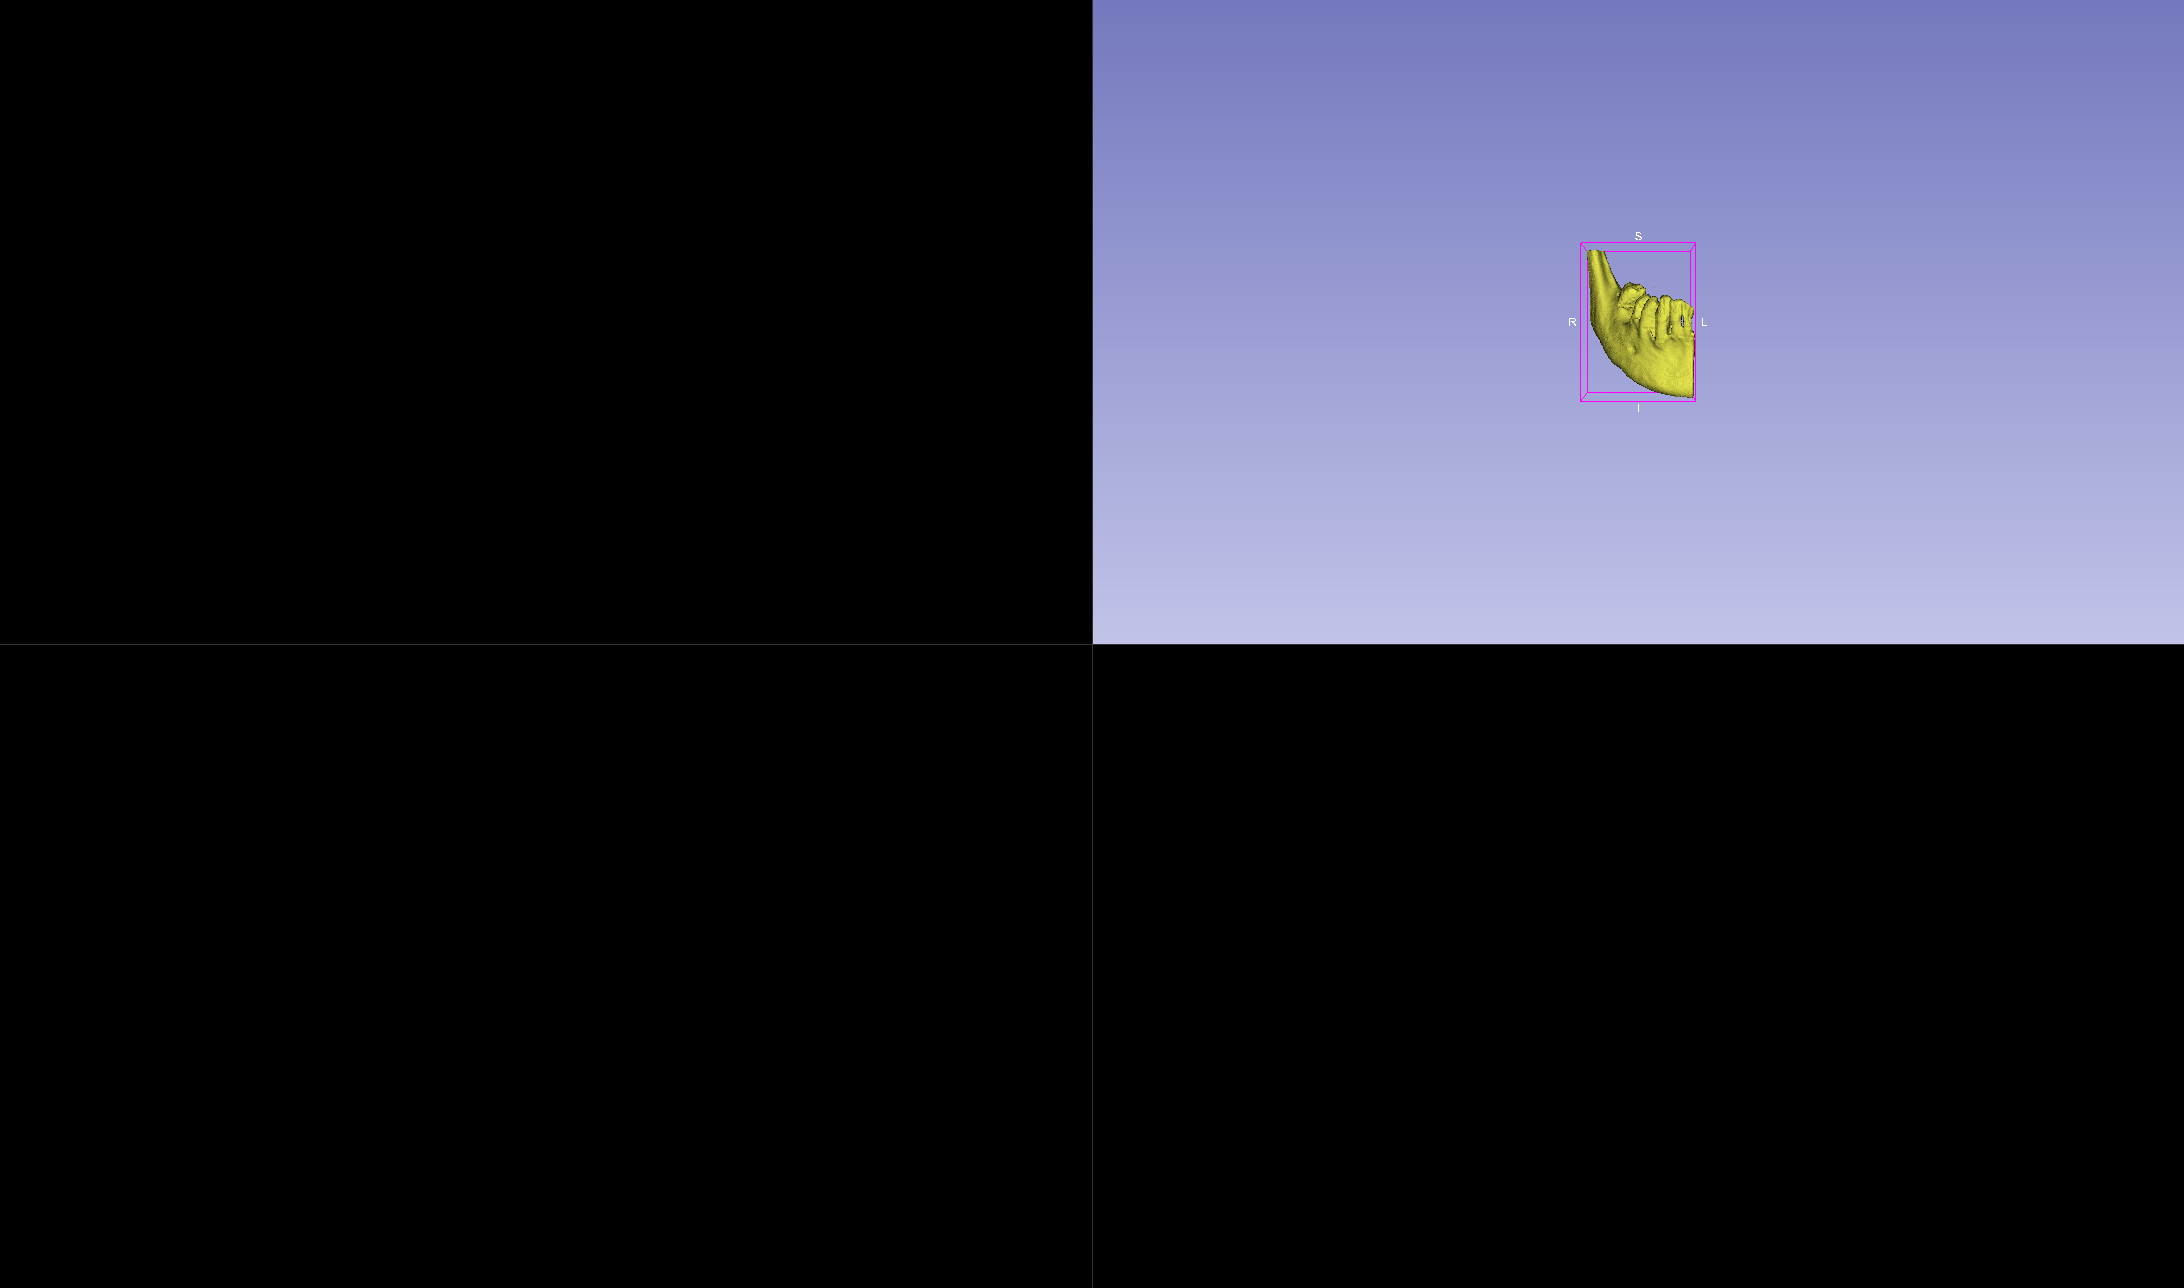

In [15]:
# C:\\Users\\Solayman\\Downloads\\Dental_Files\\post.r.m.simple.meddian.Model.vtk
# C:\\Users\\Solayman\\Downloads\\stl-files-master\\wk-blase-edit-schmelz-dicht-Post.stl

slicer.mrmlScene.Clear(False)
modelNode=slicer.modules.models.logic().AddModel(slicernb.localPath("C:\\Users\\Solayman\\Downloads\\Dental_Files\\post.r.m.simple.meddian.Model.vtk"))

slicernb.ViewDisplay()


In [16]:
# Show viewers only
slicernb.AppWindow(contents='full');

In [17]:
import vtk

modelPointValues = modelNode.GetPolyData().GetPointData().GetArray("Normals")
print(modelPointValues)
pointListNode = slicer.mrmlScene.GetFirstNodeByName("F")

if not pointListNode:
  pointListNode = slicer.mrmlScene.AddNewNodeByClass("vtkMRMLMarkupsFiducialNode","F")

pointsLocator = vtk.vtkPointLocator() # could try using vtk.vtkStaticPointLocator() if need to optimize
pointsLocator.SetDataSet(modelNode.GetPolyData())
pointsLocator.BuildLocator()

def onMouseMoved(observer,eventid):
  ras=[0,0,0]
  crosshairNode.GetCursorPositionRAS(ras)
  closestPointId = pointsLocator.FindClosestPoint(ras)
  ras = modelNode.GetPolyData().GetPoint(closestPointId)
  closestPointValue = modelPointValues.GetTuple(closestPointId)
  if pointListNode.GetNumberOfControlPoints() == 0:
    pointListNode.AddControlPoint(ras)
  else:
    pointListNode.SetNthControlPointPosition(0,*ras)
  print(f"RAS={ras}  value={closestPointValue}")

crosshairNode=slicer.util.getNode("Crosshair")
observationId = crosshairNode.AddObserver(slicer.vtkMRMLCrosshairNode.CursorPositionModifiedEvent, onMouseMoved)

vtkFloatArray (000001FF94B3C210)
  Debug: Off
  Modified Time: 447483
  Reference Count: 4
  Registered Events: (none)
  Name: Normals
  Data type: float
  Size: 960912
  MaxId: 960911
  NumberOfComponents: 3
  Information: 0000000000000000
  Name: Normals
  Number Of Components: 3
  Number Of Tuples: 320304
  Size: 960912
  MaxId: 960911
  LookupTable: (none)


